In [1]:
# Suppress package startup messages
suppressPackageStartupMessages({
    library(ggplot2)
    library(dplyr)
    library(arrow)
})


In [2]:
umap_path <- file.path("./results/umap/cfret_umap.parquet")

In [3]:
# load arrow file
umap_df <- read_parquet(umap_path) %>%
    as.data.frame()

head(umap_df)

,Metadata_WellRow,Metadata_WellCol,Metadata_heart_number,Metadata_cell_type,Metadata_heart_failure_type,Metadata_treatment,Metadata_Nuclei_Location_Center_X,Metadata_Nuclei_Location_Center_Y,Metadata_Cells_Location_Center_X,Metadata_Cells_Location_Center_Y,⋯,Metadata_Well,Metadata_Cells_Number_Object_Number,Metadata_Cytoplasm_Parent_Cells,Metadata_Cytoplasm_Parent_Nuclei,Metadata_Nuclei_Number_Object_Number,Metadata_Site,Metadata_cell_id,Metadata_cluster_label,UMAP_1,UMAP_2
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,B,2,9,failing,rejected,DMSO,221.0468,137.1155,246.6028,109.2858,⋯,B02,1,1,6,6,f00,3.741745e+18,1,3.2020521,7.338651
2,B,2,9,failing,rejected,DMSO,690.5961,183.0678,716.1701,177.1322,⋯,B02,2,2,7,7,f00,2.742388e+18,1,-1.2350227,9.696993
3,B,2,9,failing,rejected,DMSO,626.5615,206.9237,623.9437,199.9064,⋯,B02,3,3,8,8,f00,8.052449e+18,0,-0.5393953,8.988641
4,B,2,9,failing,rejected,DMSO,559.4486,220.6882,528.6466,196.9556,⋯,B02,4,4,9,9,f00,1.414799e+19,3,1.1739138,8.614181
5,B,2,9,failing,rejected,DMSO,909.0199,247.6943,897.9660,253.6218,⋯,B02,5,5,10,10,f00,4.803356e+18,1,3.0246527,7.111107
6,B,2,9,failing,rejected,DMSO,330.7563,260.8621,341.5217,269.5020,⋯,B02,6,6,11,11,f00,6.286936e+18,0,3.7269380,6.740757


- decrease size
- decrease alpha
- facet by treatment 
    - gray all points are not that treatment, keep cluster colors
- color by cluster (gray out )
    https://github.com/WayScience/phenotypic_profiling/blob/main/7.figures/Figure2_UMAP_and_Correlation.ipynb

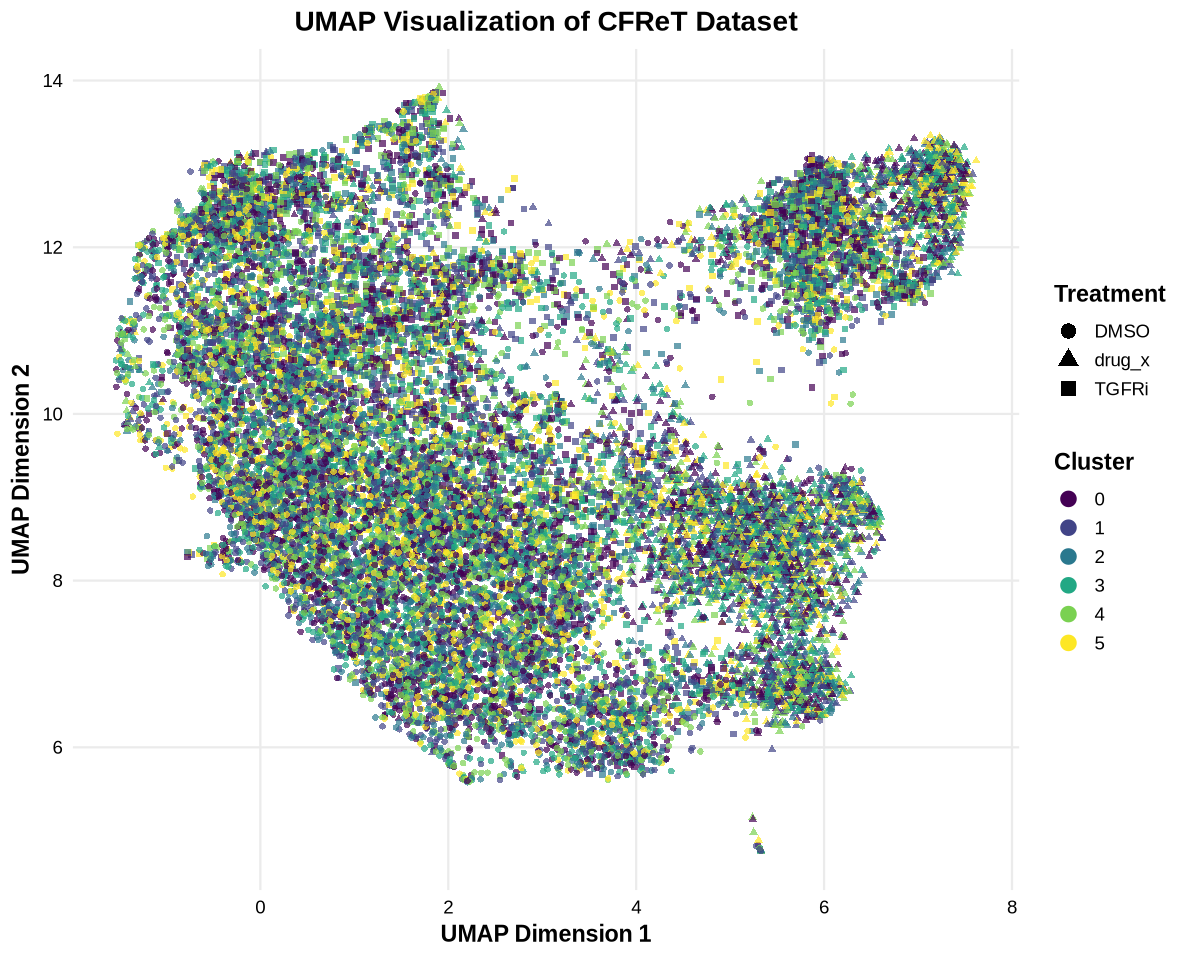

In [4]:
# make plot bigger for notebook render
options(repr.plot.width=10, repr.plot.height=8)

# Create a publication-ready UMAP plot
umap_plot <- ggplot(umap_df, aes(x = UMAP_1, y = UMAP_2,
                                  color = factor(Metadata_cluster_label),
                                  shape = Metadata_treatment)) +
  geom_point(size = 1.5, alpha = 0.7) +
  scale_color_viridis_d(name = "Cluster") +
  scale_shape_manual(values = c(16, 17, 15, 18, 8, 3, 4, 5, 6, 7)[1:length(unique(umap_df$Metadata_treatment))],
                     name = "Treatment") +
  theme_minimal(base_size = 14) +
  theme(
    panel.grid.minor = element_blank(),
    legend.position = "right",
    plot.title = element_text(hjust = 0.5, face = "bold"),
    axis.text = element_text(color = "black"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
    legend.box = "vertical"
  ) +
  labs(
    title = "UMAP Visualization of CFReT Dataset",
    x = "UMAP Dimension 1",
    y = "UMAP Dimension 2"
  ) +
  guides(
    color = guide_legend(override.aes = list(size = 4, alpha = 1)),
    shape = guide_legend(override.aes = list(size = 4, alpha = 1))
  )

umap_plot

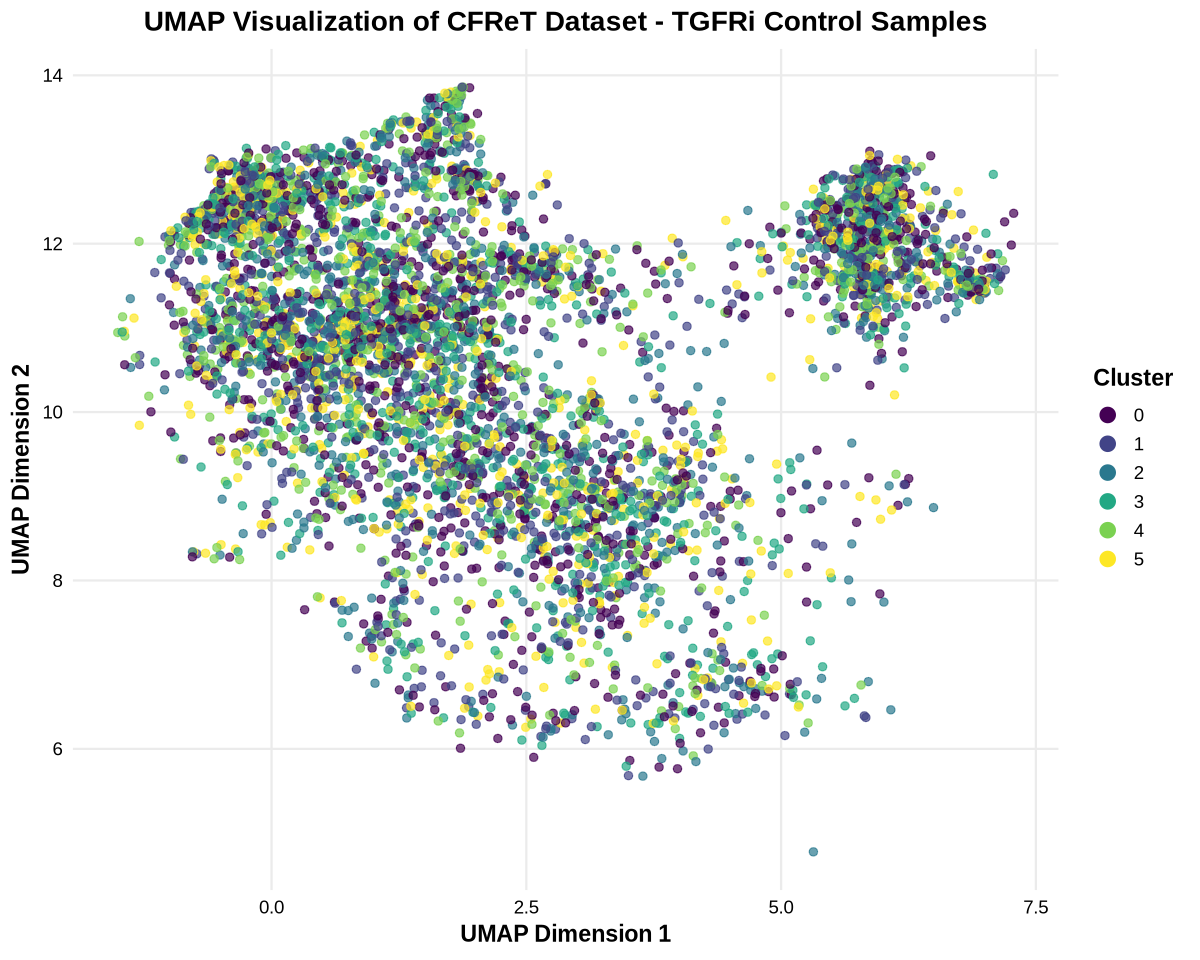

In [5]:
# Create a plot focusing on DMSO samples
# Filter the data to include only DMSO samples
dmso_umap_df <- umap_df %>%
  filter(Metadata_treatment == "TGFRi")

# make plot bigger for notebook render
options(repr.plot.width=10, repr.plot.height=8)

# Create a publication-ready UMAP plot for DMSO only
dmso_umap_plot <- ggplot(dmso_umap_df, aes(x = UMAP_1, y = UMAP_2,
                                           color = factor(Metadata_cluster_label))) +
  geom_point(size = 2, alpha = 0.7) +
  scale_color_viridis_d(name = "Cluster") +
  theme_minimal(base_size = 14) +
  theme(
    panel.grid.minor = element_blank(),
    legend.position = "right",
    plot.title = element_text(hjust = 0.5, face = "bold"),
    axis.text = element_text(color = "black"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold")
  ) +
  labs(
    title = "UMAP Visualization of CFReT Dataset - TGFRi Control Samples",
    x = "UMAP Dimension 1",
    y = "UMAP Dimension 2"
  ) +
  guides(
    color = guide_legend(override.aes = list(size = 4, alpha = 1))
  )

# Display the DMSO-only plot
dmso_umap_plot

# Save the plot if needed
# Create a results directory for the plots
plots_dir <- "./results/plots"

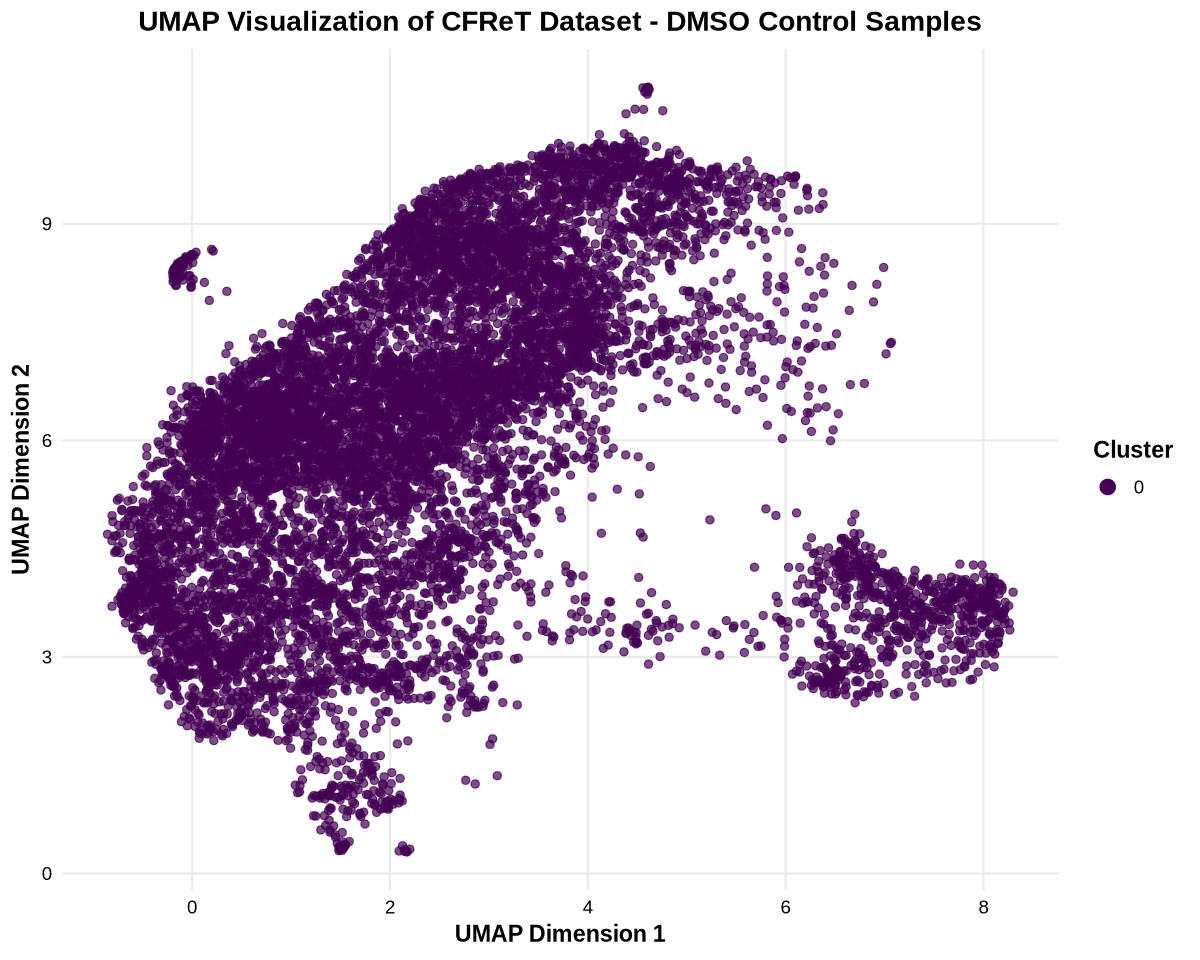

In [ ]:
# Create a plot focusing on DMSO samples
# Filter the data to include only DMSO samples
dmso_umap_df <- umap_df %>%
  filter(Metadata_treatment == "DMSO")

# make plot bigger for notebook render
options(repr.plot.width=10, repr.plot.height=8)

# Create a publication-ready UMAP plot for DMSO only
dmso_umap_plot <- ggplot(dmso_umap_df, aes(x = UMAP_1, y = UMAP_2,
                                           color = factor(Metadata_cluster_label))) +
  geom_point(size = 2, alpha = 0.7) +
  scale_color_viridis_d(name = "Cluster") +
  theme_minimal(base_size = 14) +
  theme(
    panel.grid.minor = element_blank(),
    legend.position = "right",
    plot.title = element_text(hjust = 0.5, face = "bold"),
    axis.text = element_text(color = "black"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold")
  ) +
  labs(
    title = "UMAP Visualization of CFReT Dataset - DMSO Control Samples",
    x = "UMAP Dimension 1",
    y = "UMAP Dimension 2"
  ) +
  guides(
    color = guide_legend(override.aes = list(size = 4, alpha = 1))
  )

# Display the DMSO-only plot
dmso_umap_plot

# Save the plot if needed
# Create a results directory for the plots
plots_dir <- "./results/plots"